In [11]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib scikit-learn pickle imblearn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

model_numpy = make_pipeline(StandardScaler(), LinearSVC)
model_pandas = make_pipeline(StandardScaler(), LinearSVC())

## Import Data

In [17]:
# Mendefinisikan df sebagai variabel untuk menyimpan data csv
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2021_fix.csv", encoding='latin1')

# Memanggil 15 data dari keseluruhan data
df.head(15)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,0,1,1,15,1,0,0,0,1,1,...,0,5,10,20,0,0,11,4,5,0
1,1,0,1,28,0,0,1,0,1,0,...,0,2,0,0,0,0,11,4,3,2
2,1,1,1,33,0,0,0,1,1,1,...,0,2,10,0,0,0,9,4,7,2
3,0,1,1,29,0,1,1,1,1,1,...,0,5,0,30,1,1,12,3,4,2
4,0,0,1,24,1,0,0,0,0,0,...,0,3,0,0,1,1,13,5,6,0
5,1,0,1,40,1,0,0,1,1,1,...,0,3,5,25,1,0,10,4,8,0
6,1,1,1,27,1,0,0,0,0,1,...,0,4,25,0,0,0,10,5,3,0
7,0,0,1,24,0,0,1,0,0,1,...,0,4,0,0,0,1,12,6,7,2
8,1,1,1,30,0,0,0,0,1,1,...,0,2,0,0,0,0,7,4,6,0
9,1,1,1,36,1,0,0,0,0,0,...,0,4,0,0,0,1,10,4,8,0


## Data Understanding

In [18]:
print ("Data Shape : ", df.shape)

Data Shape :  (236378, 22)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                236378 non-null  int64
 1   HighChol              236378 non-null  int64
 2   CholCheck             236378 non-null  int64
 3   BMI                   236378 non-null  int64
 4   Smoker                236378 non-null  int64
 5   Stroke                236378 non-null  int64
 6   HeartDiseaseorAttack  236378 non-null  int64
 7   PhysActivity          236378 non-null  int64
 8   Fruits                236378 non-null  int64
 9   Veggies               236378 non-null  int64
 10  HvyAlcoholConsump     236378 non-null  int64
 11  AnyHealthcare         236378 non-null  int64
 12  NoDocbcCost           236378 non-null  int64
 13  GenHlth               236378 non-null  int64
 14  MentHlth              236378 non-null  int64
 15  PhysHlth              236378 non-n

In [20]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,0.827767,...,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451,0.307791
std,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,0.377583,...,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450,0.705037
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000,0.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000,2.000000


In [21]:
df.Diabetes_012.value_counts()

Diabetes_012
0    197191
2     33568
1      5619
Name: count, dtype: int64

## Cleaning Data

In [22]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_012            0
dtype: int64

In [23]:
df.duplicated().sum()

12828

In [24]:
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

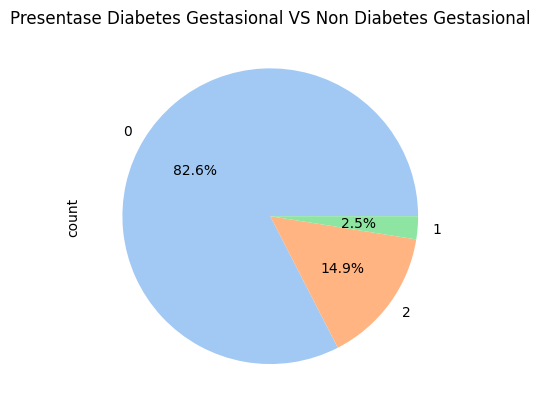

In [26]:
sns.set_palette('pastel')
df['Diabetes_012'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes Gestasional VS Non Diabetes Gestasional')
plt.show()

### Keterangan
0 -> untuk tidak menderita diabetes atau menderita diabetes selama kehamilan. (Diabetes Gestasional)

1 -> untuk pradiabetes

2 -> untuk diabetes


C:\Users\annis\AppData\Local\Temp\ipykernel_9748\3751614902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012',data=df, palette='pastel')


<Axes: xlabel='Diabetes_012', ylabel='count'>

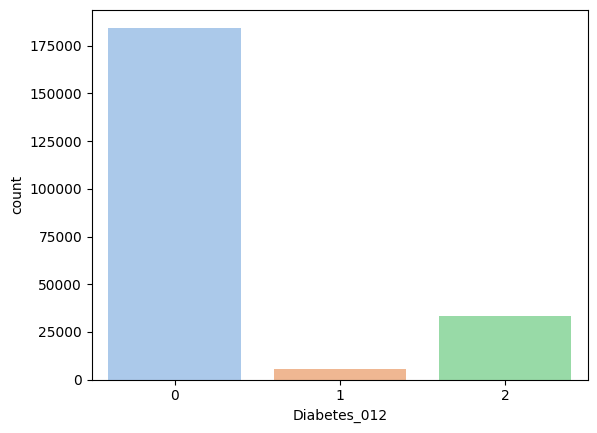

In [27]:
sns.countplot(x='Diabetes_012',data=df, palette='pastel')

In [28]:
df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
HighBP,1.000000,0.274129,0.106399,0.202857,0.085932,0.124283,0.199719,-0.122115,-0.019032,-0.026092,...,-0.014771,0.265982,-0.000654,0.132883,0.202537,0.067550,0.345298,-0.090550,-0.133428,0.263919
HighChol,0.274129,1.000000,0.103947,0.077679,0.073066,0.084369,0.168828,-0.069447,-0.015913,-0.025390,...,-0.017499,0.175508,0.011906,0.099634,0.123548,0.026811,0.284193,-0.023920,-0.055032,0.204422
CholCheck,0.106399,0.103947,1.000000,0.041475,-0.008262,0.027501,0.047018,-0.013645,0.020838,0.013535,...,-0.069290,0.051262,-0.011006,0.036127,0.049560,-0.050092,0.105063,0.024718,0.015530,0.076979
BMI,0.202857,0.077679,0.041475,1.000000,0.001134,0.004882,0.032176,-0.153241,-0.076961,-0.037062,...,0.041714,0.238137,0.077238,0.110862,0.191256,0.002245,-0.054017,-0.082045,-0.085957,0.204167
Smoker,0.085932,0.073066,-0.008262,0.001134,1.000000,0.052627,0.105148,-0.081525,-0.059289,-0.005101,...,0.040606,0.148109,0.073555,0.103651,0.114848,0.075528,0.121241,-0.162196,-0.130795,0.048561
Stroke,0.124283,0.084369,0.027501,0.004882,0.052627,1.000000,0.175449,-0.073689,0.005225,-0.020190,...,0.018925,0.155284,0.040045,0.127730,0.158851,0.002122,0.131403,-0.055518,-0.110072,0.098964
HeartDiseaseorAttack,0.199719,0.168828,0.047018,0.032176,0.105148,0.175449,1.000000,-0.090697,0.000785,-0.018382,...,0.010293,0.233582,0.027272,0.164944,0.189277,0.088446,0.227264,-0.072054,-0.116631,0.172779
PhysActivity,-0.122115,-0.069447,-0.013645,-0.153241,-0.081525,-0.073689,-0.090697,1.000000,0.106813,0.126626,...,-0.042941,-0.270600,-0.103774,-0.238717,-0.275670,0.058630,-0.121327,0.198115,0.226771,-0.142070
Fruits,-0.019032,-0.015913,0.020838,-0.076961,-0.059289,0.005225,0.000785,0.106813,1.000000,0.208139,...,-0.022965,-0.062153,-0.046557,-0.020799,-0.018637,-0.053927,0.073002,0.070672,0.036071,-0.019883
Veggies,-0.026092,-0.025390,0.013535,-0.037062,-0.005101,-0.020190,-0.018382,0.126626,0.208139,1.000000,...,-0.023594,-0.090643,-0.033965,-0.048819,-0.058143,-0.048588,0.004141,0.117357,0.126632,-0.039099


## Keterangan
untuk menghitung koefisien korelasi person antara semua kolom dalam dataframe. Nilai korelasi -1 dan 1.

1 -> korelasi positig yang sempurna -> bergerak dalam arah yang sama

0 -> tidak ada korelasi -> tidak ada hubungan linear antara dua variabel

-1 -> korelasi negatif yang sempurna -> bergerak dalam arah yang berlawanan


## Transformasi Data

In [29]:
# Scaling
## membantu meningkatkan performa model machine learning dan mempermudah interpretasi hasil model
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[-0.87143847  1.19725067  0.20009582 ... -1.15979152 -0.7709799
  -0.45011285]
 [ 1.14752795 -0.83524697  0.20009582 ... -1.15979152 -1.61212824
   2.32940534]
 [ 1.14752795  1.19725067  0.20009582 ... -1.15979152  0.07016844
   2.32940534]
 ...
 [-0.87143847  1.19725067  0.20009582 ...  0.94104343  1.33189095
  -0.45011285]
 [ 1.14752795 -0.83524697  0.20009582 ... -1.15979152 -0.35040573
  -0.45011285]
 [-0.87143847  1.19725067  0.20009582 ...  0.94104343 -0.35040573
  -0.45011285]]


### Keterangan
StandardScaler untuk menskalakan nilai-nilai dalam dataframe ke rentang yang sama, sehingga lebih mudah untuk dibandingkan dan dianalisis.

## Fitur Selection

In [30]:
# Wrapper Methods
# Recursive Feature Elimination (RFE)

x = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Memilih 10 fitur terbaik dengan RFE dan regresi linier
selector = RFE(estimator=LinearRegression(), n_features_to_select=10)
selected_features = selector.fit_transform(x, y)

# Melihat ranking fitur berdasarkan RFE
ranking = selector.ranking_

# Menampilkan nama fitur dan rankingnya
features_names = x.columns
for i, rank in enumerate(ranking):
    print(f"Fitur: {features_names[i]} - Ranking: {rank}")

Fitur: HighBP - Ranking: 1
Fitur: HighChol - Ranking: 1
Fitur: CholCheck - Ranking: 1
Fitur: BMI - Ranking: 4
Fitur: Smoker - Ranking: 2
Fitur: Stroke - Ranking: 1
Fitur: HeartDiseaseorAttack - Ranking: 1
Fitur: PhysActivity - Ranking: 1
Fitur: Fruits - Ranking: 11
Fitur: Veggies - Ranking: 9
Fitur: HvyAlcoholConsump - Ranking: 1
Fitur: AnyHealthcare - Ranking: 5
Fitur: NoDocbcCost - Ranking: 7
Fitur: GenHlth - Ranking: 1
Fitur: MentHlth - Ranking: 10
Fitur: PhysHlth - Ranking: 12
Fitur: DiffWalk - Ranking: 1
Fitur: Sex - Ranking: 1
Fitur: Age - Ranking: 3
Fitur: Education - Ranking: 8
Fitur: Income - Ranking: 6


In [31]:
x = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Definisikan model RFE dan jumlah fitur yang akan dipilih
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
# latih RFE pada data
rfe.fit(x, y)

# Dapatkan fitur yang dipilih berdasarkan RFE
selected_features = x.columns[rfe.support_]

# Drop unused features from the original DataFrame
x_reduced = x[selected_features]

# Print the reduced DataFrame with selected features
print("Reduced DataFrame with Selected Features:")
print(x_reduced)


Reduced DataFrame with Selected Features:
        HighBP  HighChol  CholCheck  Stroke  HeartDiseaseorAttack  \
0            0         1          1       0                     0   
1            1         0          1       0                     1   
2            1         1          1       0                     0   
3            0         1          1       1                     1   
4            0         0          1       0                     0   
...        ...       ...        ...     ...                   ...   
236373       1         1          1       0                     0   
236374       1         0          1       0                     0   
236375       0         1          1       0                     0   
236376       1         0          1       0                     0   
236377       0         1          1       0                     0   

        PhysActivity  HvyAlcoholConsump  GenHlth  DiffWalk  Sex  
0                  0                  0        5         0    0

## Imbalance Data

## Metode Undersampling

C:\Users\annis\AppData\Local\Temp\ipykernel_9748\3751614902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012',data=df, palette='pastel')


<Axes: xlabel='Diabetes_012', ylabel='count'>

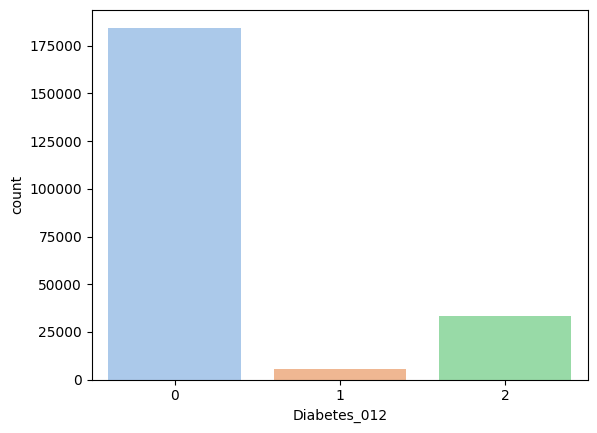

In [32]:
sns.countplot(x='Diabetes_012',data=df, palette='pastel')

In [33]:
# Analisis data
print(df['Diabetes_012'].value_counts())  # Menampilkan jumlah sampel untuk setiap kelas target


Diabetes_012
0    184542
2     33395
1      5613
Name: count, dtype: int64


In [34]:
# Pilih metode undersampling (Random Undersampling)
from imblearn.under_sampling import RandomUnderSampler


In [35]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Generate a random imbalanced dataset
x, y = make_classification(n_classes=3, class_sep=3,
weights=[0.6, 0.3, 0.1], n_informative=10,
n_redundant=1, flip_y=0, n_features=21,
n_clusters_per_class=1, n_samples=56199,
random_state=10)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Fit and transform the dataset
x_resampled, y_resampled = rus.fit_resample(x, y)

# Print the number of samples in each class before and after resampling
print("Before resampling:")
print(np.bincount(y))
print("After resampling:")
print(np.bincount(y_resampled))

Before resampling:
[33720 16860  5619]
After resampling:
[5619 5619 5619]


In [36]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [37]:
# sebelum undersampling
print(x.shape)
print(y.shape)

(223550, 21)
(223550,)


In [38]:
# jumlah data setelah dilakukan undersampling
print(x_resampled.shape)
print(y_resampled.shape)

(16857, 21)
(16857,)


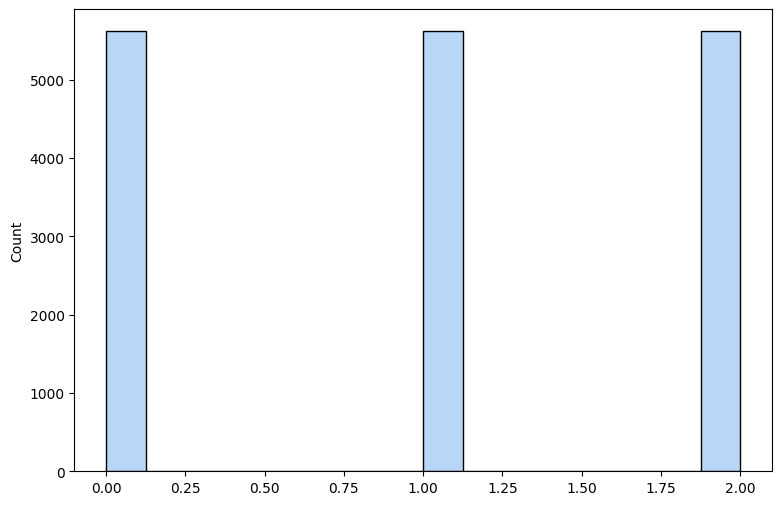

In [39]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_resampled)
plt.show()

## Split Data


In [40]:
x = df.drop(columns=['Diabetes_012'], axis=1)
y = df['Diabetes_012']
print("x : ", x_resampled.shape)
print("y : ", y_resampled.shape)

x :  (16857, 21)
y :  (16857,)


In [41]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [42]:
from sklearn.model_selection import train_test_split


# Split data menjadi training set dan test set
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


## Modeling SVM

In [43]:
clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      1162
           2       1.00      1.00      1.00      1091

    accuracy                           1.00      3372
   macro avg       1.00      1.00      1.00      3372
weighted avg       1.00      1.00      1.00      3372

Akurasi SVM : 100.00%


In [44]:
clf = SVC(kernel = 'poly' , degree=3, C=1.0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      1162
           2       1.00      1.00      1.00      1091

    accuracy                           1.00      3372
   macro avg       1.00      1.00      1.00      3372
weighted avg       1.00      1.00      1.00      3372

Akurasi SVM : 100.00%


In [45]:
clf = SVC(kernel = 'sigmoid' , gamma=1.0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1119
           1       0.92      0.91      0.91      1162
           2       0.98      0.94      0.96      1091

    accuracy                           0.93      3372
   macro avg       0.93      0.93      0.93      3372
weighted avg       0.93      0.93      0.93      3372

Akurasi SVM : 93.24%


In [46]:
clf = SVC(kernel = 'rbf' , gamma=0.1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      1162
           2       0.99      1.00      1.00      1091

    accuracy                           1.00      3372
   macro avg       1.00      1.00      1.00      3372
weighted avg       1.00      1.00      1.00      3372

Akurasi SVM : 99.79%


## Testing

In [47]:
new_data = {
    'HighBP' : [1],
    'HighChol' : [0],
    'CholCheck' : [1],
    'BMI' : [28],
    'Smoker' : [0],
    'Stroke' : [0],
    'HeartDiseaseorAttack' : [1],
    'PhysActivity' : [0],
    'Fruits' : [1],
    'Veggies' : [0],
    'HvyAlcoholConsump' : [0],
    'AnyHealthcare' : [1],
    'NoDocbcCost' : [0],
    'GenHlth' : [2],
    'MentHlth' : [0],
    'PhysHlth' : [0],
    'DiffWalk' : [0],
    'Sex' : [0],
    'Age' : [11],
    'Education' : [4],
    'Income' : [3]
}

new_data = pd.DataFrame(new_data)
new_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0,1,28,0,0,1,0,1,0,...,1,0,2,0,0,0,0,11,4,3


In [48]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print('Diagnosis Data Baru : ', y_pred_new)

Diagnosis Data Baru :  [0]


## simpan model

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaler.fit(x_train)
x = scaler.transform(x)

In [51]:
data_diskalaan_uji = scaler.transform(x_test)

In [52]:
model_numpy = make_pipeline(StandardScaler(), LinearSVC())

model_numpy.fit(x_train, y_train)

y_pred = model_numpy.predict(x_test)
print(classification_report(y_test, y_pred))

with open("model_numpy.pkl", "wb") as model_file:
  pickle.dump(model_numpy, model_file)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1119
           1       1.00      1.00      1.00      1162
           2       1.00      1.00      1.00      1091

    accuracy                           1.00      3372
   macro avg       1.00      1.00      1.00      3372
weighted avg       1.00      1.00      1.00      3372



c:\Users\annis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [53]:
# load model
with open("model_numpy.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [54]:
new_data = {
    'HighBP' : [4],
    'HighChol' : [1],
    'CholCheck' : [0],
    'BMI' : [36.6],
    'Smoker' : [1],
    'Stroke' : [1],
    'HeartDiseaseorAttack' : [4],
    'PhysActivity' : [2],
    'Fruits' : [9],
    'Veggies' : [8],
    'HvyAlcoholConsump' : [0],
    'AnyHealthcare' : [5],
    'NoDocbcCost' : [4],
    'GenHlth' : [0],
    'MentHlth' : [30],
    'PhysHlth' : [1],
    'DiffWalk' : [1],
    'Sex' : [0],
    'Age' : [7],
    'Education' : [1],
    'Income' : [11]
}

new_data = pd.DataFrame(new_data)
new_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,4,1,0,36.6,1,1,4,2,9,8,...,5,4,0,30,1,1,0,7,1,11


In [55]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print('Diagnosis Data Baru : ', y_pred_new)

Diagnosis Data Baru :  [2]


c:\Users\annis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
